In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Mobile_data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [6]:
df.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


<AxesSubplot:>

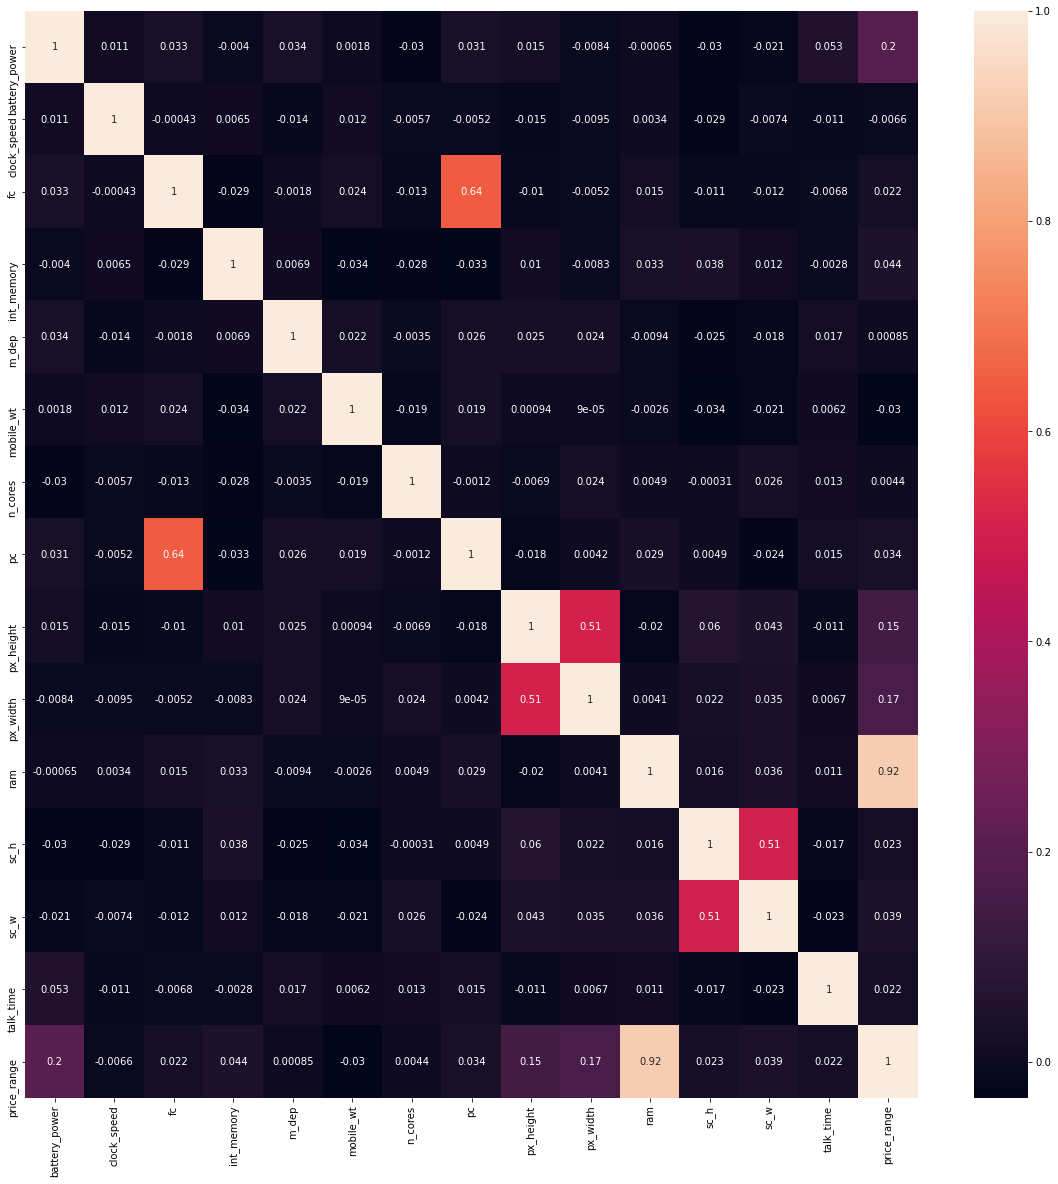

In [7]:
#PC adn FC are highly correlated, and ram seems to be the best predictor
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0
pc,2000.0,9.91650,6.064315,0.0,5.00,10.0,15.00,20.0
px_height,2000.0,645.10800,443.780811,0.0,282.75,564.0,947.25,1960.0
px_width,2000.0,1251.51550,432.199447,500.0,874.75,1247.0,1633.00,1998.0


In [9]:
for cols in df.columns:
    print(cols , df[df[cols] > df[cols].mean() + df[cols].std() * 2.5].count().max())

battery_power 0
clock_speed 0
fc 42
int_memory 0
m_dep 0
mobile_wt 0
n_cores 0
pc 0
px_height 26
px_width 0
ram 0
sc_h 0
sc_w 27
talk_time 0
price_range 0


<AxesSubplot:xlabel='fc', ylabel='Count'>

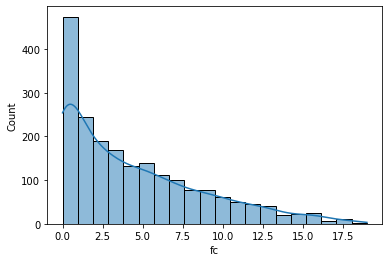

In [10]:
#Outliers are only at the upper end so no need to lower clip
sns.histplot(x = 'fc', data = df, kde = True)

In [11]:
df['fc'] = df['fc'].clip(upper = df['fc'].mean() + df['fc'].std()* 2.5)

<AxesSubplot:xlabel='px_height', ylabel='Count'>

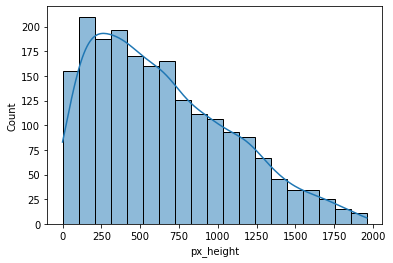

In [12]:
#No need to lower clip because outliers are the the upper end
sns.histplot(x = 'px_height', data = df, kde = True)

In [13]:
df['px_height'] = df['px_height'].clip(upper = df['px_height'].mean() + df['px_height'].std()* 2.5)

<AxesSubplot:xlabel='sc_w', ylabel='Count'>

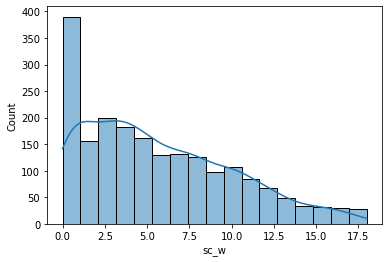

In [14]:
#No need to lower clip because outliers are the the upper end
sns.histplot(x = 'sc_w', data = df, kde = True)

In [15]:
df['sc_w'] = df['sc_w'].clip(upper = df['sc_w'].mean() + df['sc_w'].std()* 2.5)

<AxesSubplot:xlabel='price_range', ylabel='clock_speed'>

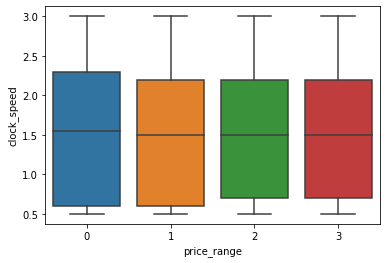

In [61]:
#Very Bad Predictor, No distinction 
sns.boxplot(x = 'price_range', y = 'clock_speed', data = df)

In [62]:
df.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

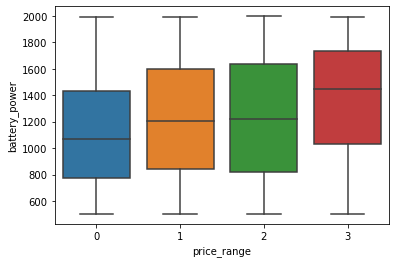

In [63]:
#All Right predictor
sns.boxplot(x = 'price_range', y = 'battery_power', data = df)

<AxesSubplot:xlabel='price_range', ylabel='fc'>

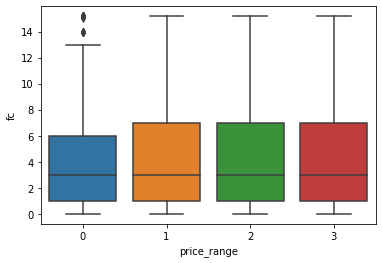

In [65]:
#Very Bad Predictor, No distinction 
sns.boxplot(x = 'price_range', y = 'fc', data = df)

<AxesSubplot:xlabel='price_range', ylabel='int_memory'>

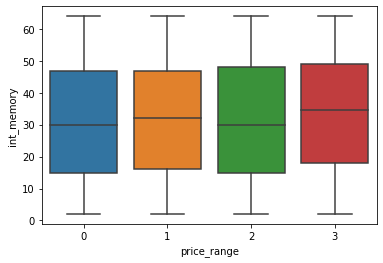

In [66]:
#Very Bad Predictor, No distinction 
sns.boxplot(x = 'price_range', y = 'int_memory', data = df)

<AxesSubplot:xlabel='price_range', ylabel='m_dep'>

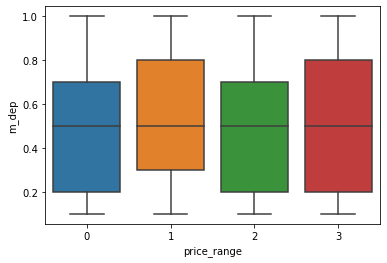

In [67]:
#Very Bad Predictor, No distinction 
sns.boxplot(x = 'price_range', y = 'm_dep', data = df)

<AxesSubplot:xlabel='price_range', ylabel='mobile_wt'>

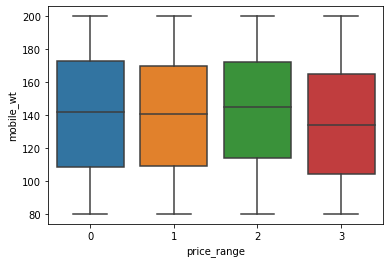

In [68]:
#Very Bad Predictor, No distinction 
sns.boxplot(x = 'price_range', y = 'mobile_wt', data = df)

<AxesSubplot:xlabel='price_range', ylabel='n_cores'>

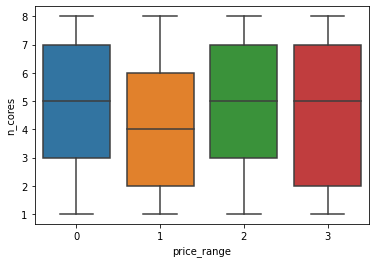

In [69]:
#Very Bad Predictor, No distinction 
sns.boxplot(x = 'price_range', y = 'n_cores', data = df)

<AxesSubplot:xlabel='price_range', ylabel='pc'>

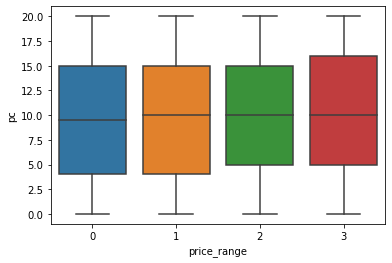

In [70]:
#Very Bad Predictor, No distinction 
sns.boxplot(x = 'price_range', y = 'pc', data = df)

<AxesSubplot:xlabel='price_range', ylabel='px_height'>

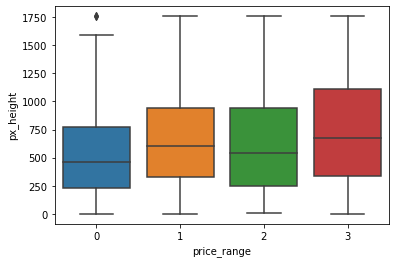

In [71]:
#Very Bad Predictor, No distinction 
sns.boxplot(x = 'price_range', y = 'px_height', data = df)

<AxesSubplot:xlabel='price_range', ylabel='px_width'>

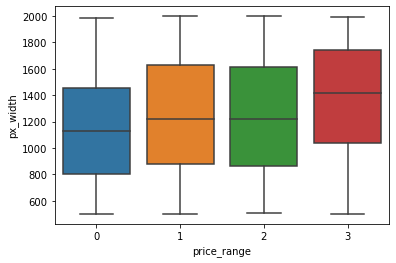

In [72]:
#Very Bad Predictor, No distinction 
sns.boxplot(x = 'price_range', y = 'px_width', data = df)

<AxesSubplot:xlabel='price_range', ylabel='ram'>

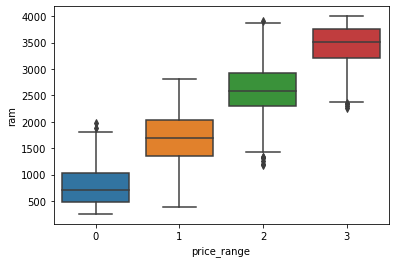

In [73]:
#Great Predictor, best so far
sns.boxplot(x = 'price_range', y = 'ram', data = df)

<AxesSubplot:xlabel='price_range', ylabel='sc_h'>

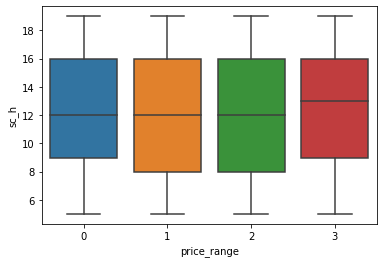

In [74]:
#Very Bad Predictor, No distinction 
sns.boxplot(x = 'price_range', y = 'sc_h', data = df)

<AxesSubplot:xlabel='price_range', ylabel='sc_w'>

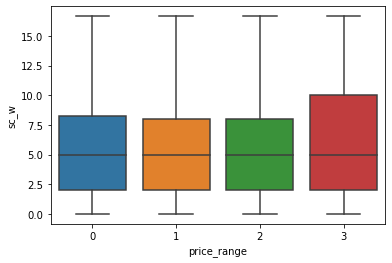

In [75]:
#Very Bad Predictor, No distinction 
sns.boxplot(x = 'price_range', y = 'sc_w', data = df)

<AxesSubplot:xlabel='price_range', ylabel='talk_time'>

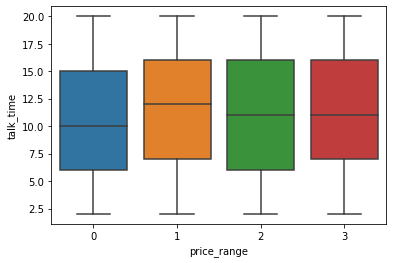

In [77]:
#Very Bad Predictor, No distinction 
sns.boxplot(x = 'price_range', y = 'talk_time', data = df)

#### Feature selection using Random foest classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [21]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [23]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [24]:
sel.get_support()

array([ True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False])

In [25]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

2

In [78]:
selected_feat

Index(['battery_power', 'ram'], dtype='object')

In [81]:
X = df[selected_feat]
y = df.iloc[:,-1]


#### Model selection

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

In [102]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [103]:
gnb.fit(X_train, y_train)

GaussianNB()

In [104]:
y_pred_gnb = gnb.predict(X_test)

In [105]:
metrics.confusion_matrix(y_test, y_pred_gnb)

array([[94, 12,  0,  0],
       [12, 65, 24,  0],
       [ 0, 15, 58, 14],
       [ 0,  0,  9, 97]], dtype=int64)

In [106]:
print("R2Score =", metrics.r2_score(y_test, y_pred_gnb))
print("Accuracy =", metrics.accuracy_score(y_test, y_pred_gnb))

R2Score = 0.835839485375875
Accuracy = 0.785


In [107]:
print(metrics.classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       106
           1       0.71      0.64      0.67       101
           2       0.64      0.67      0.65        87
           3       0.87      0.92      0.89       106

    accuracy                           0.79       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.78      0.79      0.78       400

